<a href="https://colab.research.google.com/github/Noob919/PET-EXPERIMENT/blob/main/pristine_pet_weight_loss_DR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [2]:
df =  pd.read_csv("/content/PRISTINE PET MP.csv")
df.columns

Index(['time', 'tem', 'heating rate', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')

In [3]:
df.drop(0, inplace=True)
df.rename(columns={'Unnamed: 3':"Weight loss", 'Unnamed: 4':"DTG",'Unnamed: 5': "label"}, errors="raise",inplace =  True)
df_na = df.dropna()
df_na.tail(5)

,time,tem,heating rate,Weight loss,DTG,label
4050,67.48333333,967.66,14.33924426,56.454816,-0.013943,Validation
4051,67.5,967.85,14.33851852,56.454816,-0.013939,Training
4052,67.51666667,967.97,14.33675636,56.454816,-0.013936,Training
4053,67.53333333,968.2,14.33662389,56.454816,-0.013933,Training
4054,67.55,968.41,14.33619541,56.454816,-0.013929,Training


In [4]:
df_res =  df_na[['time', 'tem', 'heating rate', 'Weight loss']]
df_res.tail(3)

,time,tem,heating rate,Weight loss
4052,67.51666667,967.97,14.33675636,56.454816
4053,67.53333333,968.2,14.33662389,56.454816
4054,67.55,968.41,14.33619541,56.454816


In [5]:
label = df_na['label']
label = label.reset_index()
label

,index,label
0,1,Training
1,2,Training
2,3,Validation
3,4,Training
4,5,Test
...,...,...
4049,4050,Validation
4050,4051,Training
4051,4052,Training
4052,4053,Training


In [6]:
def root_series(df):
  df_sq = df*df
  df_sum = df_sq.sum(axis=1)
  root =  pd.Series(data  = df_sum)
  root = pd.DataFrame(np.power(root, 0.5), columns = ['Root'])
  return root

def transformation(DataFrame):
  scaler  = Normalizer()
  transform_df = scaler.fit_transform(DataFrame)
  return transform_df

In [7]:
transform_df = transformation(df_res)
transform_df = pd.DataFrame(transform_df)
transform_df.columns = ['time', 'tem', 'heating rate', 'Weight loss']
transform_df

,time,tem,heating rate,Weight loss
0,0.000000e+00,0.950111,0.000000,0.311911
1,9.117128e-07,0.016664,0.999846,0.005470
2,3.645528e-06,0.033313,0.999385,0.010937
3,8.195068e-06,0.049931,0.998618,0.016390
4,1.455386e-05,0.066503,0.997547,0.021831
...,...,...,...,...
4049,6.944462e-02,0.995783,0.014756,0.058096
4050,6.944817e-02,0.995784,0.014752,0.058084
4051,6.945670e-02,0.995784,0.014749,0.058077
4052,6.945740e-02,0.995785,0.014745,0.058063


In [8]:
dataframe = pd.concat([transform_df,label],axis =1)
dataframe

,time,tem,heating rate,Weight loss,index,label
0,0.000000e+00,0.950111,0.000000,0.311911,1,Training
1,9.117128e-07,0.016664,0.999846,0.005470,2,Training
2,3.645528e-06,0.033313,0.999385,0.010937,3,Validation
3,8.195068e-06,0.049931,0.998618,0.016390,4,Training
4,1.455386e-05,0.066503,0.997547,0.021831,5,Test
...,...,...,...,...,...,...
4049,6.944462e-02,0.995783,0.014756,0.058096,4050,Validation
4050,6.944817e-02,0.995784,0.014752,0.058084,4051,Training
4051,6.945670e-02,0.995784,0.014749,0.058077,4052,Training
4052,6.945740e-02,0.995785,0.014745,0.058063,4053,Training


In [9]:
df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['Weight loss']

In [10]:
from sklearn.tree import DecisionTreeRegressor
DTCLF = DecisionTreeRegressor()
DTCLF.fit(X,y)

DecisionTreeRegressor()

In [11]:
df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['Weight loss']
predictions_val = DTCLF.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val

,0
0,0.005470
1,0.093566
2,0.128551
3,0.147760
4,0.188148
...,...
400,0.058396
401,0.058330
402,0.058205
403,0.058123


In [12]:
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 2.442859303334097e-07
RMSE 0.0004942529011886625
MAE 0.00012409712004426727
R2_Score 0.9999525536510938


In [13]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df
prediction = pd.DataFrame(predictions_val)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)

In [14]:
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,Weight loss
0,0.000004,0.033313,0.999385,0.005470,0.010937
1,0.000311,0.300432,0.948733,0.093566,0.098216
2,0.000519,0.381624,0.915898,0.128551,0.124477


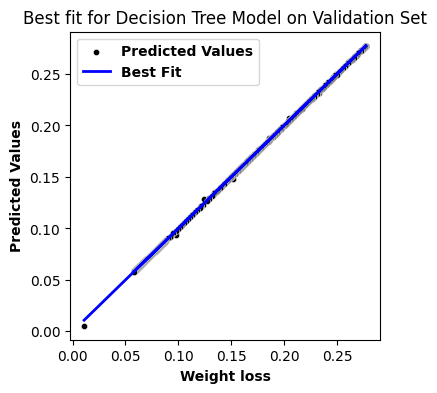

In [15]:
x = final_df['Weight loss']
y = final_df['preditions']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='black', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='blue', label='Best Fit', linewidth=2)


plt.title('Best fit for Decision Tree Model on Validation Set')
plt.xlabel('Weight loss', fontsize=10, fontweight='bold')  # Set the x-axis label to 'Weight loss'
plt.ylabel('Predicted Values', fontsize=10, fontweight='bold')
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()

In [16]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['Weight loss']

In [17]:
predictions_test = DTCLF.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

,0
0,0.016390
1,0.079148
2,0.116026
3,0.171169
4,0.193246
...,...
401,0.058376
402,0.058262
403,0.058269
404,0.058107


In [18]:
print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 2.3713806941183467e-07
RMSE 0.00048696824271387006
MAE 0.00012326335749973378
R2_Score 0.9999539362650648


In [19]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
X_test_df

,time,tem,heating rate
0,0.000015,0.066503,0.997547
1,0.000224,0.256752,0.962819
2,0.000481,0.368694,0.921736
3,0.001133,0.536658,0.825627
4,0.001431,0.588983,0.785310
...,...,...,...
401,0.069163,0.995784,0.014903
402,0.069241,0.995785,0.014859
403,0.069262,0.995786,0.014848
404,0.069392,0.995785,0.014785


In [20]:
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,Weight loss
0,0.000015,0.066503,0.997547,0.016390,0.021831
1,0.000224,0.256752,0.962819,0.079148,0.084016
2,0.000481,0.368694,0.921736,0.116026,0.120283
3,0.001133,0.536658,0.825627,0.171169,0.174176
4,0.001431,0.588983,0.785310,0.193246,0.190749
...,...,...,...,...,...
401,0.069163,0.995784,0.014903,0.058376,0.058386
402,0.069241,0.995785,0.014859,0.058262,0.058278
403,0.069262,0.995786,0.014848,0.058269,0.058252
404,0.069392,0.995785,0.014785,0.058107,0.058115


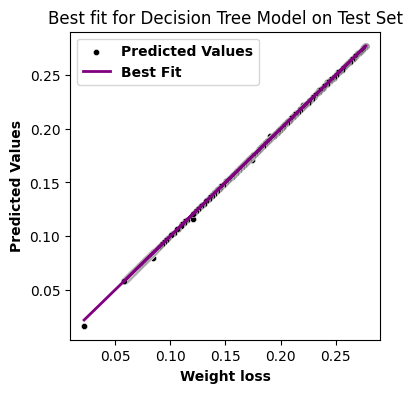

In [21]:
x = final_df_test['Weight loss']
y = final_df_test['predictions_test']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='black', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='purple', label='Best Fit', linewidth=2)


plt.title('Best fit for Decision Tree Model on Test Set')
plt.xlabel('Weight loss', fontsize=10, fontweight='bold')  # Set the x-axis label to 'Weight loss'
plt.ylabel('Predicted Values', fontsize=10, fontweight='bold')
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rfc = RandomForestRegressor()

df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['Weight loss']


rfc.fit(X,y)

df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['Weight loss']

predictions_val = rfc.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 2.0657455395008746e-08
RMSE 0.00014372701692795528
MAE 3.7597948444510794e-05
R2_Score 0.9999959878129909


In [24]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df
prediction = pd.DataFrame(predictions_val)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,Weight loss
0,0.000004,0.033313,0.999385,0.011849,0.010937
1,0.000311,0.300432,0.948733,0.097472,0.098216
2,0.000519,0.381624,0.915898,0.126802,0.124477


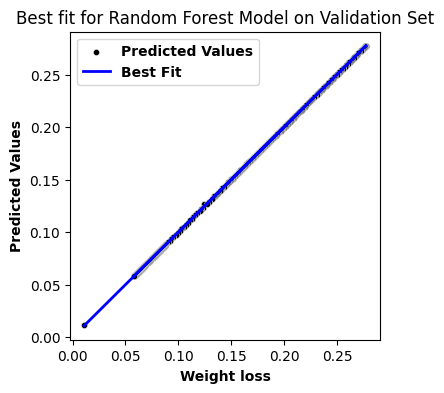

In [25]:
x = final_df['Weight loss']
y = final_df['preditions']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='black', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='Blue', label='Best Fit', linewidth=2)


plt.title('Best fit for Random Forest Model on Validation Set')
plt.xlabel('Weight loss', fontsize=10, fontweight='bold')  # Set the x-axis label to 'Weight loss'
plt.ylabel('Predicted Values', fontsize=10, fontweight='bold')
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()

In [26]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['Weight loss']

predictions_test = rfc.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 4.047213159066584e-08
RMSE 0.0002011768664401199
MAE 4.567141871312788e-05
R2_Score 0.9999921383456208


In [27]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,Weight loss
0,0.000015,0.066503,0.997547,0.020293,0.021831
1,0.000224,0.256752,0.962819,0.082615,0.084016
2,0.000481,0.368694,0.921736,0.117199,0.120283
3,0.001133,0.536658,0.825627,0.173628,0.174176
4,0.001431,0.588983,0.785310,0.191686,0.190749
...,...,...,...,...,...
401,0.069163,0.995784,0.014903,0.058383,0.058386
402,0.069241,0.995785,0.014859,0.058274,0.058278
403,0.069262,0.995786,0.014848,0.058257,0.058252
404,0.069392,0.995785,0.014785,0.058110,0.058115


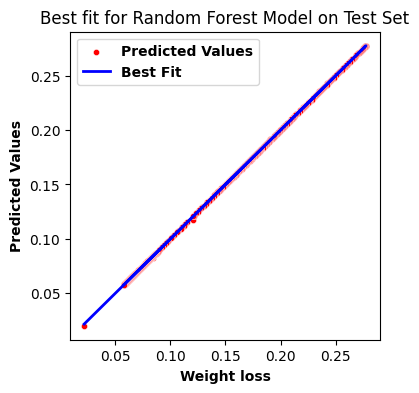

In [28]:
x = final_df_test['Weight loss']
y = final_df_test['predictions_test']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='Red', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='blue', label='Best Fit', linewidth=2)


plt.title('Best fit for Random Forest Model on Test Set')
plt.xlabel('Weight loss', fontsize=10, fontweight='bold')  # Set the x-axis label to 'Weight loss'
plt.ylabel('Predicted Values', fontsize=10, fontweight='bold')
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()

In [29]:
from sklearn.svm import SVR

svr = SVR()

df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['Weight loss']

svr.fit(X,y)

df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['Weight loss']

predictions_val = svr.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 0.004745365066660842
RMSE 0.06888661021316728
MAE 0.05993133609205884
R2_Score 0.07833313882369852


In [30]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df
prediction = pd.DataFrame(predictions_val)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,Weight loss
0,0.000004,0.033313,0.999385,0.105329,0.010937
1,0.000311,0.300432,0.948733,0.119953,0.098216
2,0.000519,0.381624,0.915898,0.127157,0.124477


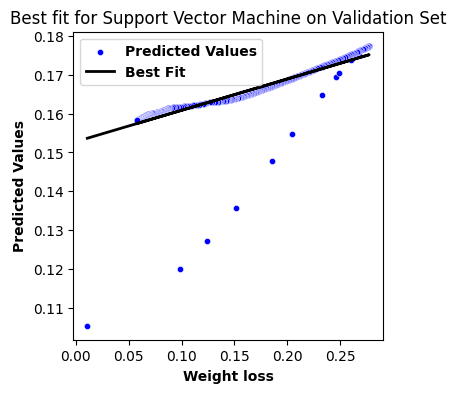

In [31]:
x = final_df['Weight loss']
y = final_df['preditions']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='blue', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='black', label='Best Fit', linewidth=2)


plt.title('Best fit for Support Vector Machine on Validation Set')
plt.xlabel('Weight loss', fontsize=10, fontweight='bold')  # Set the x-axis label to 'Weight loss'
plt.ylabel('Predicted Values', fontsize=10, fontweight='bold')
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()

In [32]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['Weight loss']

predictions_test = svr.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 0.004750393961775093
RMSE 0.06892310180030418
MAE 0.060051154573396694
R2_Score 0.0772426846702069


In [33]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,Weight loss
0,0.000015,0.066503,0.997547,0.106350,0.021831
1,0.000224,0.256752,0.962819,0.116577,0.084016
2,0.000481,0.368694,0.921736,0.125934,0.120283
3,0.001133,0.536658,0.825627,0.143608,0.174176
4,0.001431,0.588983,0.785310,0.149644,0.190749
...,...,...,...,...,...
401,0.069163,0.995784,0.014903,0.158353,0.058386
402,0.069241,0.995785,0.014859,0.158334,0.058278
403,0.069262,0.995786,0.014848,0.158329,0.058252
404,0.069392,0.995785,0.014785,0.158298,0.058115


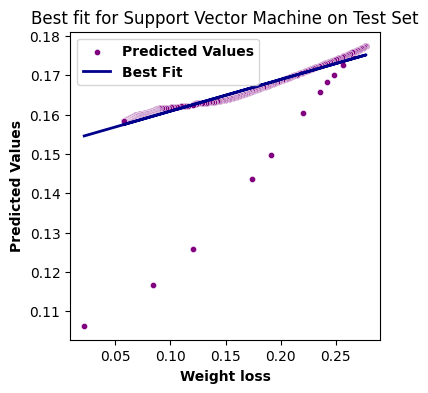

In [34]:
x = final_df_test['Weight loss']
y = final_df_test['predictions_test']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='purple', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='darkblue', label='Best Fit', linewidth=2)


plt.title('Best fit for Support Vector Machine on Test Set')
plt.xlabel('Weight loss', fontsize=10, fontweight='bold')  # Set the x-axis label to 'Weight loss'
plt.ylabel('Predicted Values', fontsize=10, fontweight='bold')
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()